In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [39]:
class NeLMap:
    def __init__(self, filename, scale, multiply_by=1, flip_lr=False):
        d=np.loadtxt(open(filename,"r"),delimiter=",")
        d=d-np.nan_to_num(d).min()
        d=np.nan_to_num(d)
        if flip_lr is True:
            d=np.fliplr(d)
        self.neL=d*multiply_by
        self.scale=scale
    def plot_neL(self, clim=[0,2], ax=None, transpose=False):
        if ax is None:
            fig, ax=plt.subplots(figsize=(12,8))
        d=self.neL/1e18
        if transpose is True:
            d=np.transpose(d)
        ax.imshow(self.neL/1e18)#, cmap='afmhot', interpolation='none', clim=clim)
    def set_origin(self, origin, x_range=11.5, y_range=8.5):
        self.origin=origin
        ymin=origin[0]-y_range*self.scale
        ymax=origin[0]+y_range*self.scale
        xmin=origin[1]-x_range*self.scale
        xmax=origin[1]+x_range*self.scale
        self.neL_crop=self.neL[ymin:ymax, xmin:xmax]
        self.extent=[-x_range,x_range,-y_range,y_range]
    def plot_neL_mm(self,clim=[0,2], ax=None, transpose=False, cmap=cmaps.cmaps['inferno']):
        if ax is None:
            fig, ax=plt.subplots(figsize=(12,8))
        d=self.neL_crop/1e18
        ex=self.extent
        if transpose is True:
            d=np.transpose(d)
            ex=ex[2:4]+ex[0:2]
        return ax.imshow(d, cmap=cmap, interpolation='none', clim=clim, extent=ex, aspect=1)
    def create_lineout(self, axis, centre=None,average_over_px=20, mm_range=10):
        px_range=mm_range*self.scale
        if axis is 1:
            d=np.transpose(self.neL)
            y0=self.origin[1] if centre is None else centre
            x0=self.origin[0]
        if axis is 0:
            d=self.neL
            y0=self.origin[0] if centre is None else centre
            x0=self.origin[1]
        section=d[y0-average_over_px:y0+average_over_px, x0-px_range:x0+px_range]
        self.lo=np.mean(section, axis=0)
        self.mm=np.linspace(-px_range, px_range, 2*px_range)/self.scale
    def plot_lineout(self, ax=None, label=''):
        if ax is None:
            fig, ax=plt.subplots(figsize=(12,8))
        ax.plot(self.mm, self.lo/1e18, label=label, lw=4)

## s1006_15

In [18]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


In [19]:
s1006_15_532=NeLMap('s1006_15 532nm neL.txt', scale=173)
s1006_15_532.set_origin(origin=(1760,2328))
s1006_15_355=NeLMap('s1006_15 355nm neL.txt', scale=128, multiply_by=2, flip_lr=True)
s1006_15_355.set_origin(origin=(1200,1680))

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


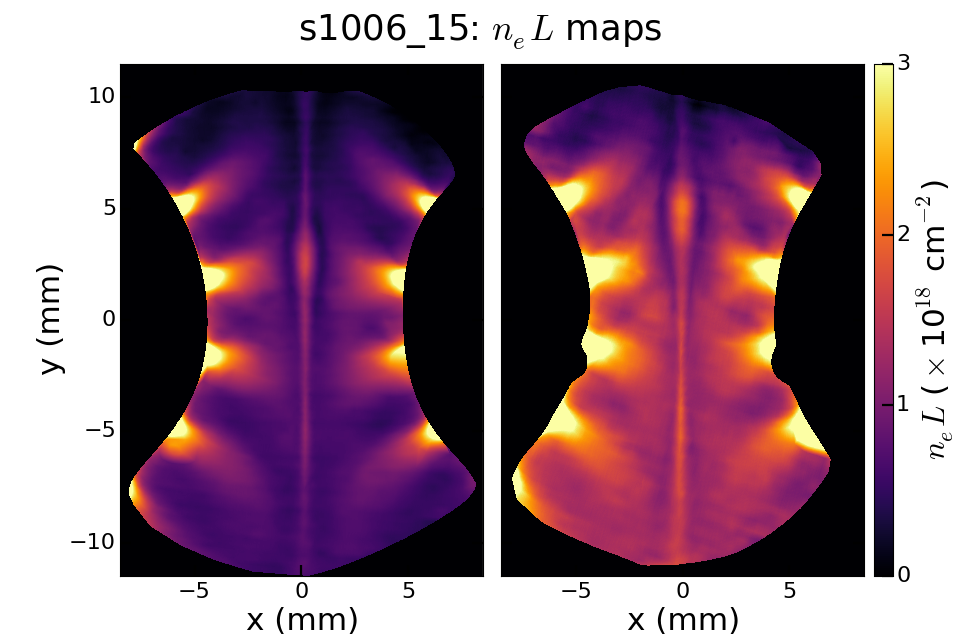

In [20]:
fig, [ax1, ax2]=plt.subplots(1,2,sharey=True, figsize=(12,8))
gim=s1006_15_532.plot_neL_mm(ax=ax1, clim=[0,3],transpose=True)
bim=s1006_15_355.plot_neL_mm(ax=ax2, clim=[0,3],transpose=True)
ax1.set_xlabel('x (mm)',fontsize=28)
ax1.set_ylabel('y (mm)',fontsize=28)
ax2.set_xlabel('x (mm)',fontsize=28)
ax2.set_xticks([-5,0,5])
ax1.set_xticks([-5,0,5])

ax1.tick_params(labelsize=20, pad=5, length=10, width=2)
ax2.tick_params(labelsize=20, pad=5, length=10, width=2)

fig.subplots_adjust(wspace=0.05)

cbar_ax = fig.add_axes([0.91, 0.10, 0.02, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(bim, cax=cbar_ax, ticks=[0.0,1,2,3.0])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=28)

fig.suptitle(r's1006_15: $n_e L$ maps', fontsize=32)

## s1026_15

In [40]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


In [41]:
s1026_15_532=NeLMap('s1026_15 532nm neL.txt', scale=173)
s1026_15_532.set_origin(origin=(1734,2449))
s1026_15_355=NeLMap('s1026_15 355nm neL.txt', scale=128, multiply_by=2, flip_lr=True)
s1026_15_355.set_origin(origin=(1193,1586))

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


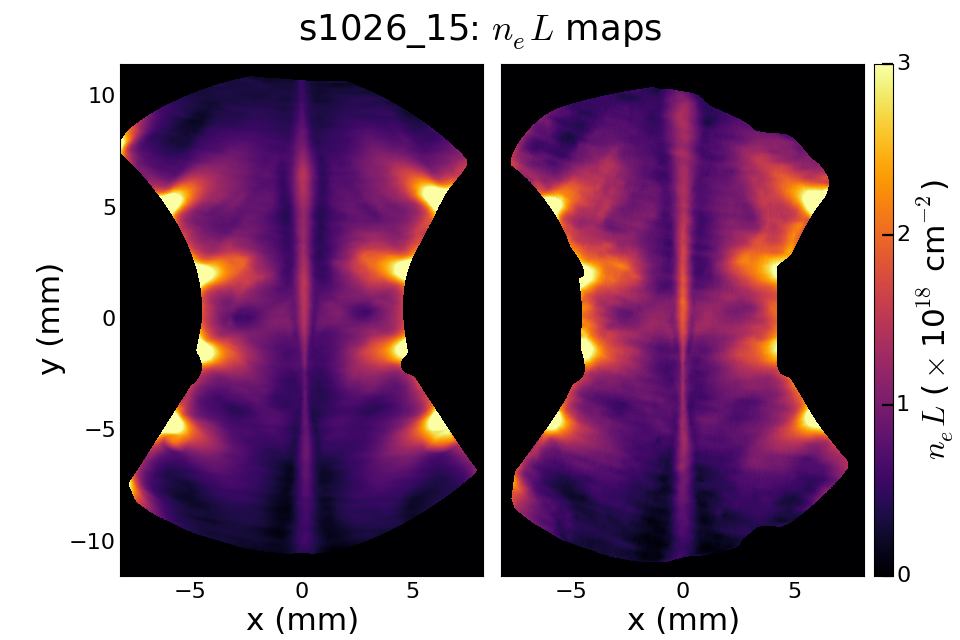

In [42]:
fig, [ax1, ax2]=plt.subplots(1,2,sharey=True, figsize=(12,8))
gim=s1026_15_532.plot_neL_mm(ax=ax1, clim=[0,3],transpose=True)
bim=s1026_15_355.plot_neL_mm(ax=ax2, clim=[0,3],transpose=True)
ax1.set_xlabel('x (mm)',fontsize=28)
ax1.set_ylabel('y (mm)',fontsize=28)
ax2.set_xlabel('x (mm)',fontsize=28)
ax2.set_xticks([-5,0,5])
ax1.set_xticks([-5,0,5])

ax1.tick_params(labelsize=20, pad=5, length=10, width=2)
ax2.tick_params(labelsize=20, pad=5, length=10, width=2)

fig.subplots_adjust(wspace=0.05)

cbar_ax = fig.add_axes([0.91, 0.10, 0.02, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(bim, cax=cbar_ax, ticks=[0.0,1,2,3.0])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=28)

fig.suptitle(r's1026_15: $n_e L$ maps', fontsize=32)

## Compare s1006_15 and s1026_15

<IPython.core.display.Javascript object>


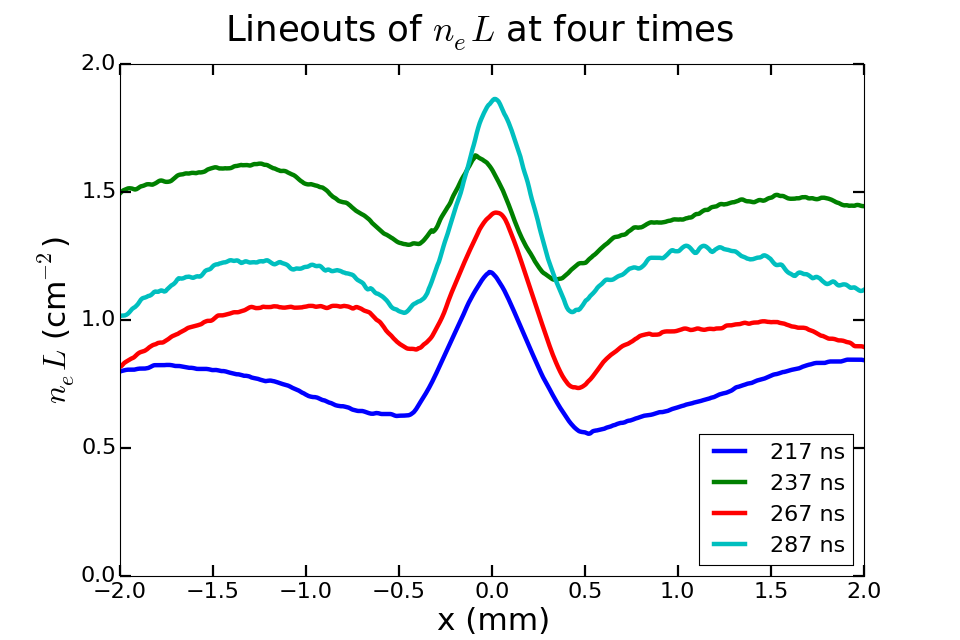

In [15]:
s1006_15_532.create_lineout(axis=1)
s1006_15_355.create_lineout(axis=1)
s1026_15_532.create_lineout(axis=1)
s1026_15_355.create_lineout(axis=1)

fig, ax=plt.subplots(figsize=(12,8))

s1006_15_532.plot_lineout(ax=ax, label='217 ns')
s1006_15_355.plot_lineout(ax=ax, label='237 ns')
s1026_15_532.plot_lineout(ax=ax, label='267 ns')
s1026_15_355.plot_lineout(ax=ax, label='287 ns')

ax.set_xlim([-2,2])#
ax.set_ylim([0, 2])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel(r'$n_e L$ (cm$^{-2}$)',fontsize=28)
fig.suptitle(r'Lineouts of $n_e L$ at four times', fontsize=32)

ax.tick_params(labelsize=20, pad=5, length=10, width=2)

ax.legend(fontsize=20, loc=4)

## Lineouts of s1006_15

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


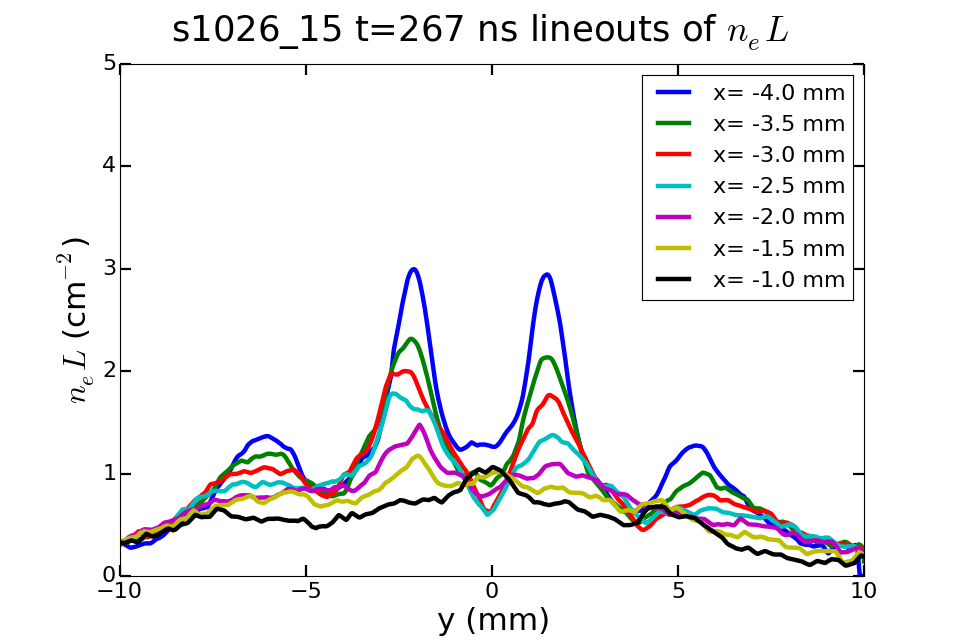

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [45]:
fig, ax=plt.subplots(figsize=(12,8))
s=s1026_15_532
for y_mm in np.arange(-4,-0.5, 0.5):
    y_px=s.origin[0]+y_mm*s.scale
    s.create_lineout(axis=0, centre=y_px, mm_range=10)
    s.plot_lineout(ax=ax, label="x= "+str(y_mm)+" mm")
ax.set_xlim([-10,10])#
ax.set_ylim([0, 5])

ax.set_xlabel('y (mm)',fontsize=28)
ax.set_ylabel(r'$n_e L$ (cm$^{-2}$)',fontsize=28)
fig.suptitle(r's1026_15 t=267 ns lineouts of $n_e L$', fontsize=32)

ax.tick_params(labelsize=20, pad=5, length=10, width=2)

ax.legend(fontsize=20)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


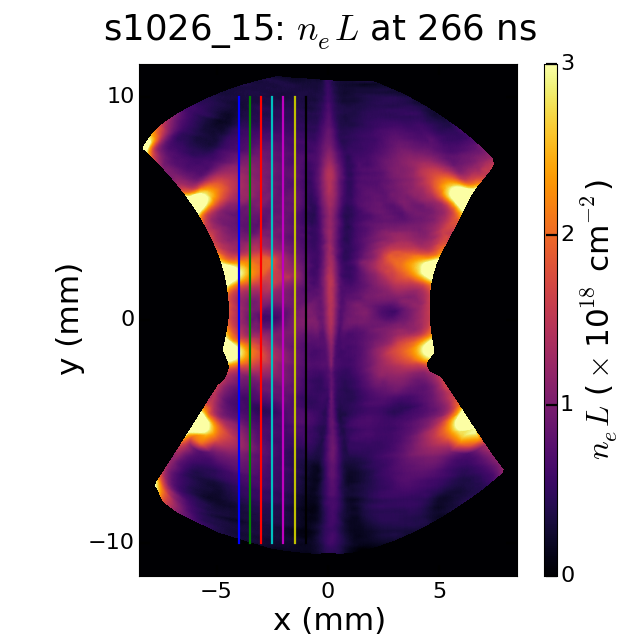

In [57]:
s=s1026_15_532
fig, ax=plt.subplots(figsize=(8,8))
gim=s.plot_neL_mm(ax=ax, clim=[0,3],transpose=True)

for x_mm in np.arange(-4,-0.5, 0.5):
    ax.plot([x_mm,x_mm],[-10,10], lw=2)
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)
ax.set_xlim([-8.5,8.5])
ax.set_ylim([-11.5,11.5])

ax.set_xticks([-5,0,5])
ax.set_yticks([-10,0,10])

ax.tick_params(labelsize=20, pad=5, length=10, width=2)

cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(gim, cax=cbar_ax, ticks=[0.0,1,2,3.0])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=28)

fig.suptitle(r's1026_15: $n_e L$ at 266 ns', fontsize=32)

In [54]:
s.extent

[-11.5, 11.5, -8.5, 8.5]

In [36]:
s.neL_crop.shape

(2905, 3979)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


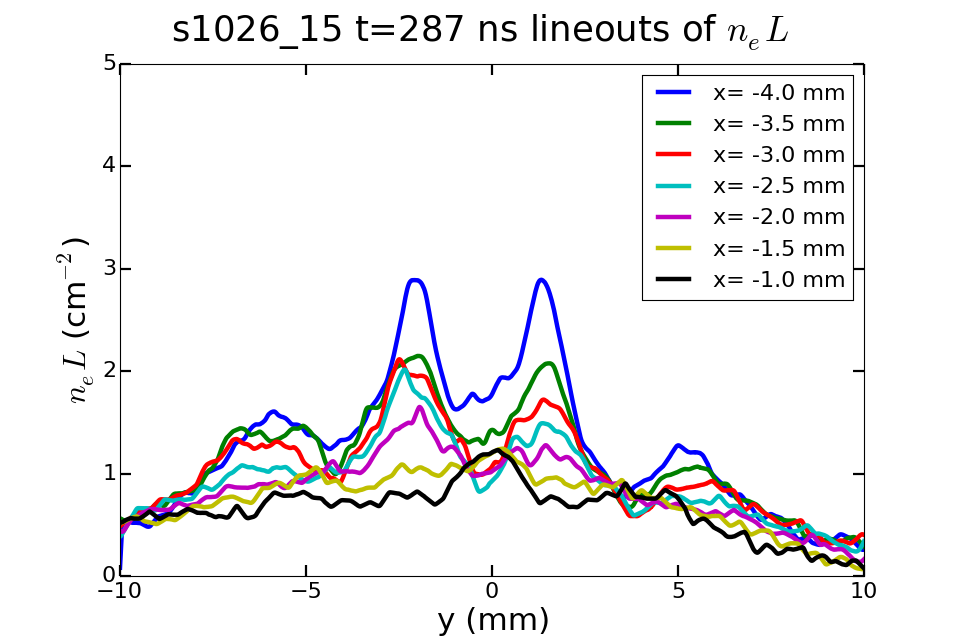

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [81]:
fig, ax=plt.subplots(figsize=(12,8))
s=s1026_15_355
for y_mm in np.arange(-4,-0.5, 0.5):
    y_px=s.origin[0]+y_mm*s.scale
    s.create_lineout(axis=0, centre=y_px, mm_range=10)
    s.plot_lineout(ax=ax, label="x= "+str(y_mm)+" mm")
ax.set_xlim([-10,10])#
ax.set_ylim([0, 5])

ax.set_xlabel('y (mm)',fontsize=28)
ax.set_ylabel(r'$n_e L$ (cm$^{-2}$)',fontsize=28)
fig.suptitle(r's1026_15 t=287 ns lineouts of $n_e L$', fontsize=32)

ax.tick_params(labelsize=20, pad=5, length=10, width=2)

ax.legend(fontsize=20)

In [65]:
y_px=s.origin[0]-4*s.scale
s.create_lineout(axis=0, centre=y_px, px_range=2000)
np.trapz(s.lo, x=s.mm/10)

2.3028926968329367e+18

## Old Code

In [5]:
green=np.loadtxt(open('s1006_15 532nm neL.txt',"r"),delimiter=",")
green=green-np.nan_to_num(green).min()
green=np.nan_to_num(green)

<IPython.core.display.Javascript object>


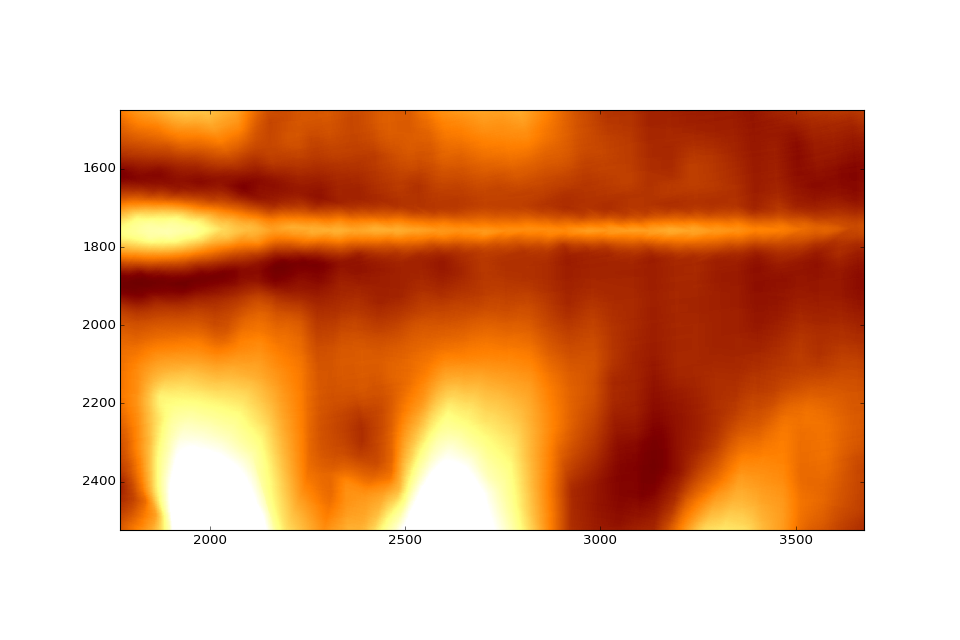

In [6]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(green, cmap='afmhot', interpolation='none', clim=[0,2e18])

In [7]:
gx_min=600
gx_max=4280
gy_centre=1760
green_lo=np.mean(green[gy_centre-20:gy_centre+20,gx_min:gx_max], axis=0)
gscale=173
gcentre=2328
g_mm=np.linspace(gx_min-gcentre, gx_max-gcentre, gx_max-gx_min)/gscale

<IPython.core.display.Javascript object>


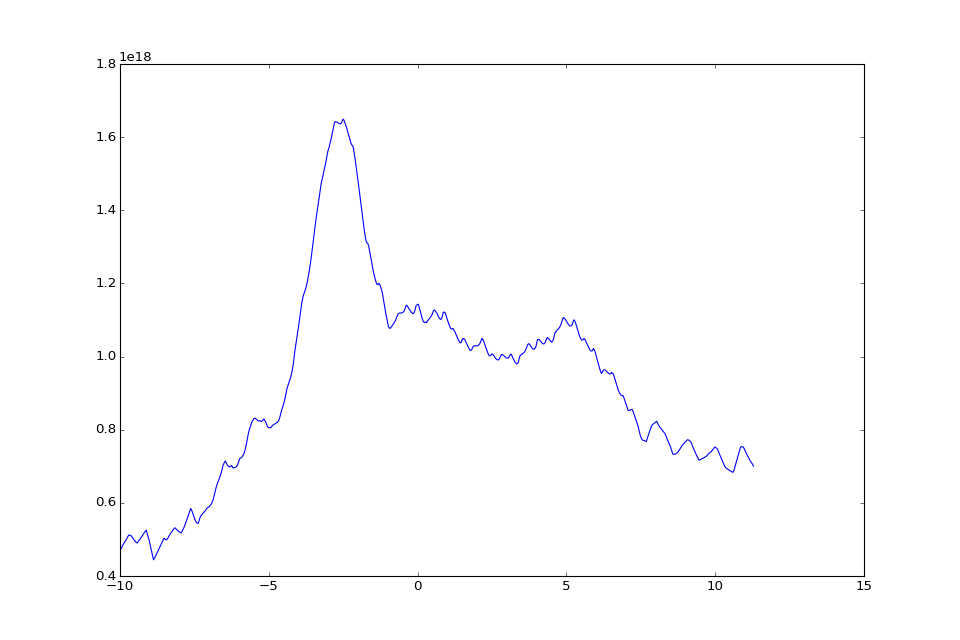

In [8]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.plot(g_mm,green_lo)

In [9]:
bluer=np.loadtxt(open('s1006_15 355nm neL.txt',"r"),delimiter=",")
bluer=bluer-np.nan_to_num(bluer).min()
bluer=np.nan_to_num(bluer)
bluer=np.fliplr(bluer)
blue=bluer*2 #traced every other line

<IPython.core.display.Javascript object>


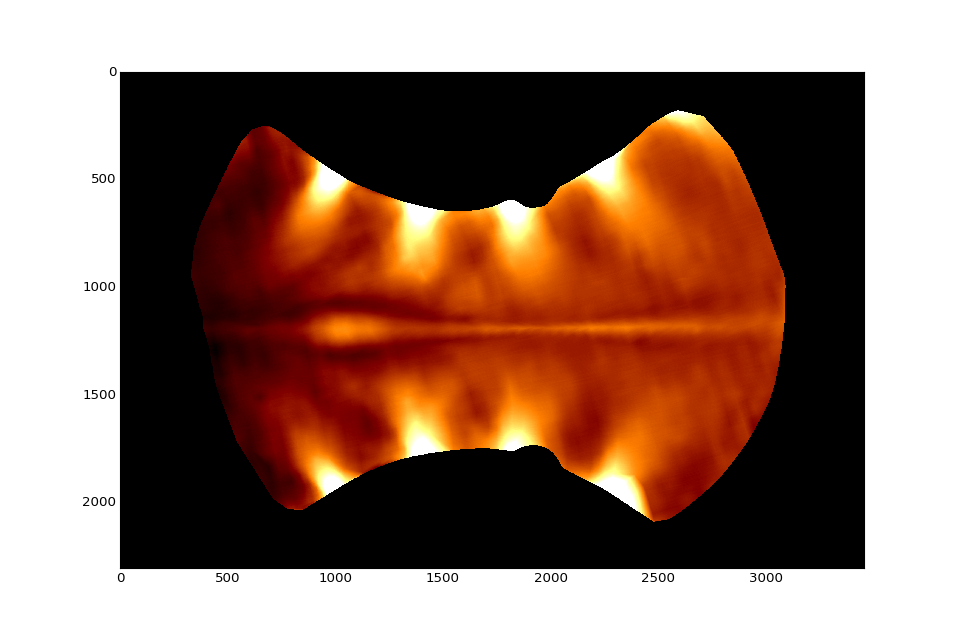

In [10]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(blue, cmap='afmhot', interpolation='none', clim=[0,4e18])

In [11]:
bx_min=418
bx_max=3055
by_centre=1195
blue_lo=np.mean(blue[by_centre-20:by_centre+20,bx_min:bx_max], axis=0)
bscale=128
bcentre=1610
b_mm=np.linspace(bx_min-bcentre, bx_max-bcentre, bx_max-bx_min)/bscale

In [12]:
g_0=(1760,2328)
b_0=(1200,1680)
gs=173
bs=128
y_reg=8.5#mm
x_reg=11.5#mm
g_ne=np.transpose(green[g_0[0]-y_reg*gs:g_0[0]+y_reg*gs, g_0[1]-x_reg*gs:g_0[1]+x_reg*gs]/1.6)
b_ne=np.transpose(blue[b_0[0]-y_reg*bs:b_0[0]+y_reg*bs, b_0[1]-x_reg*bs:b_0[1]+x_reg*bs]/1.6)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


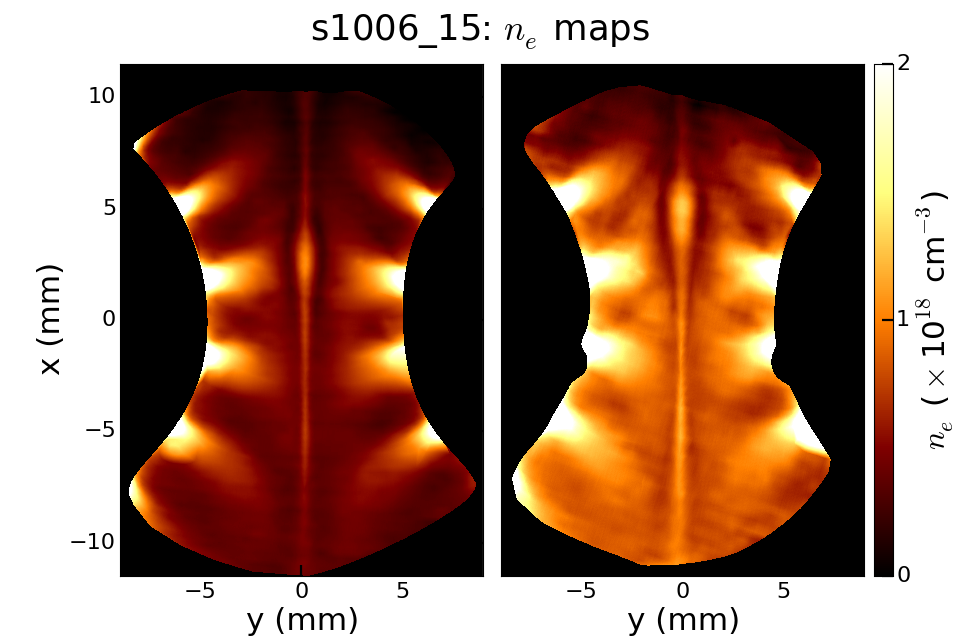

In [13]:
fig, [ax1, ax2]=plt.subplots(1,2,sharey=True, figsize=(12,8))
gim=ax1.imshow(g_ne/1e18, cmap='afmhot', interpolation='none', clim=[0,2], extent=[-9,9,-11.5,11.5], aspect='auto')
bim=ax2.imshow(b_ne/1e18, cmap='afmhot', interpolation='none', clim=[0,2], extent=[-9,9,-11.5,11.5], aspect='auto')
ax1.set_xlabel('y (mm)',fontsize=28)
ax1.set_ylabel('x (mm)',fontsize=28)
ax2.set_xlabel('y (mm)',fontsize=28)
ax2.set_xticks([-5,0,5])
ax1.set_xticks([-5,0,5])

ax1.tick_params(labelsize=20, pad=5, length=10, width=2)
ax2.tick_params(labelsize=20, pad=5, length=10, width=2)

fig.subplots_adjust(wspace=0.05)

cbar_ax = fig.add_axes([0.91, 0.10, 0.02, 0.8])#l,b,w,h

cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(bim, cax=cbar_ax, ticks=[0.0,1,2.0])
cbar_ax.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=28)
fig.suptitle(r's1006_15: $n_e$ maps', fontsize=32)


In [ ]:
fig.savefig('s1006_15 ne maps.png', dpi=300)

<IPython.core.display.Javascript object>


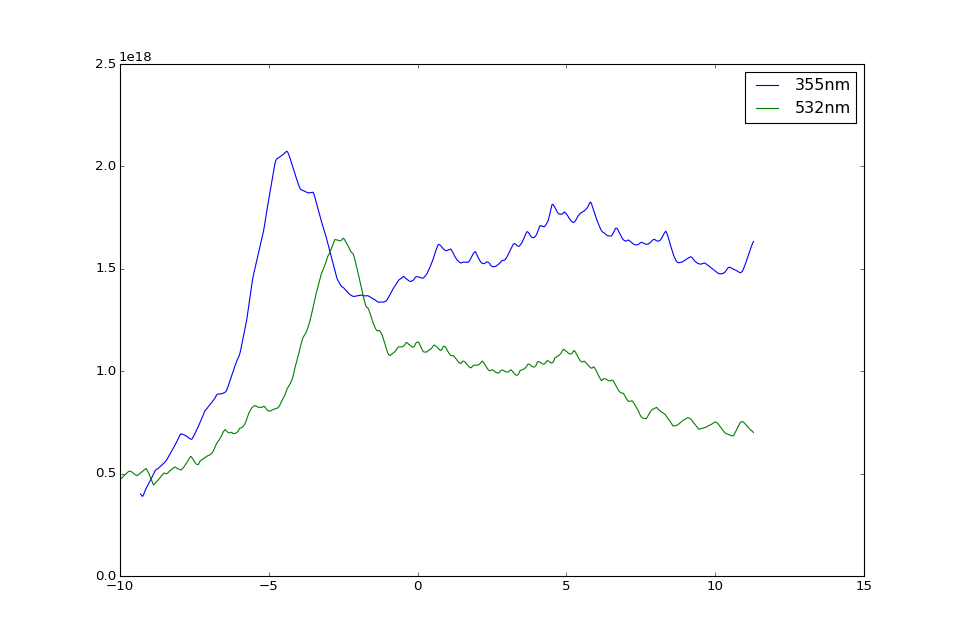

In [36]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(b_mm,blue_lo, label='355nm')
ax.plot(g_mm,green_lo, label='532nm')
ax.legend()

<IPython.core.display.Javascript object>


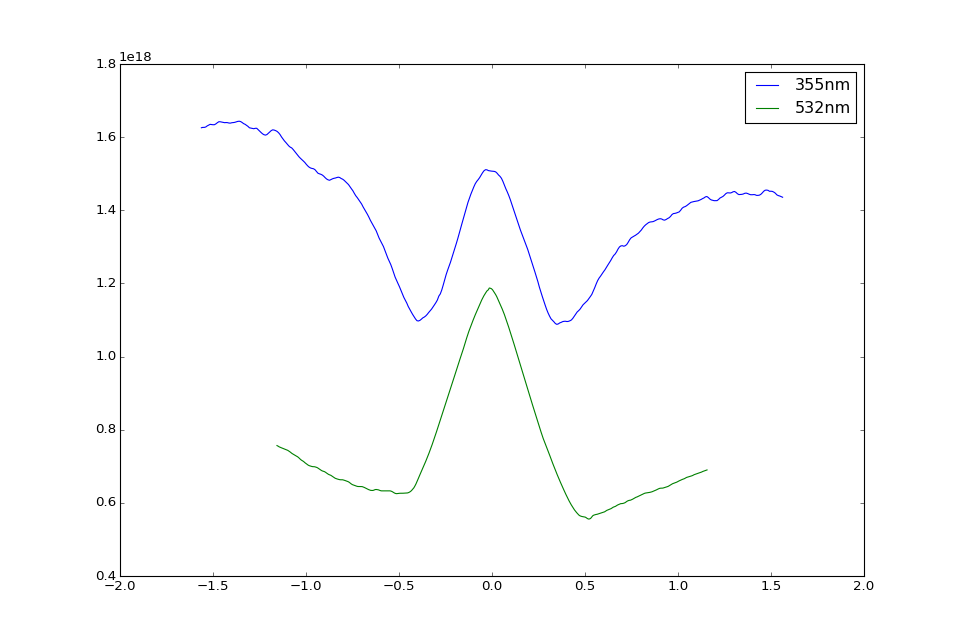

In [14]:
green_x_profile=np.mean(green[gy_centre-200:gy_centre+200,gcentre-20:gcentre+20], axis=1)
gx_profile_mm=np.linspace(-200,200, 400)/gscale
blue_x_profile=np.mean(blue[by_centre-200:by_centre+200,bcentre-20:bcentre+20], axis=1)
bx_profile_mm=np.linspace(-200,200, 400)/bscale

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(bx_profile_mm,blue_x_profile, label='355nm')
ax.plot(gx_profile_mm,green_x_profile, label='532nm')
ax.legend()

In [15]:
bpos=4.4
gpos=2.6
V=(bpos-gpos)*1e-3/(20e-9)

In [16]:
%cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


In [17]:
green=np.loadtxt(open('s1026_15 532nm neL.txt',"r"),delimiter=",")
green=green-np.nan_to_num(green).min()
green=np.nan_to_num(green)

<IPython.core.display.Javascript object>


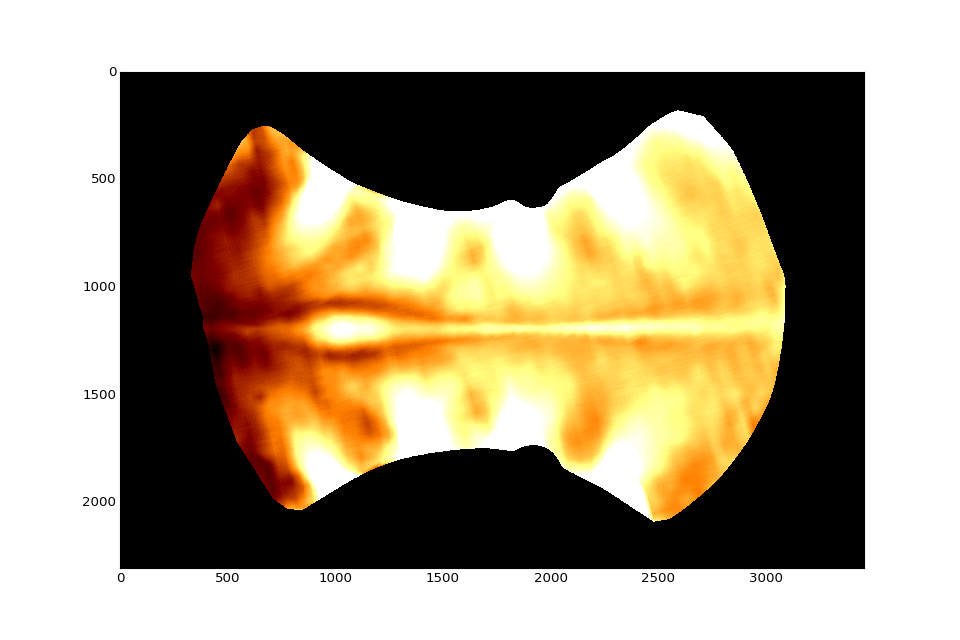

In [18]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(blue, cmap='afmhot', interpolation='none', clim=[0,2e18])

In [19]:
blue=np.loadtxt(open('s1026_15 355nm neL.txt',"r"),delimiter=",")
blue=blue-np.nan_to_num(blue).min()
blue=np.nan_to_num(blue)
blue=np.fliplr(blue)*2 #traced every other fringe

In [20]:
g_0=(1734,2449)
b_0=(1193,1586)
gs=173
bs=128
y_reg=8.5#mm
x_reg=11.5#mm
g_ne=np.transpose(green[g_0[0]-y_reg*gs:g_0[0]+y_reg*gs, g_0[1]-x_reg*gs:g_0[1]+x_reg*gs]/1.6)
b_ne=np.transpose(blue[b_0[0]-y_reg*bs:b_0[0]+y_reg*bs, b_0[1]-x_reg*bs:b_0[1]+x_reg*bs]/1.6)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


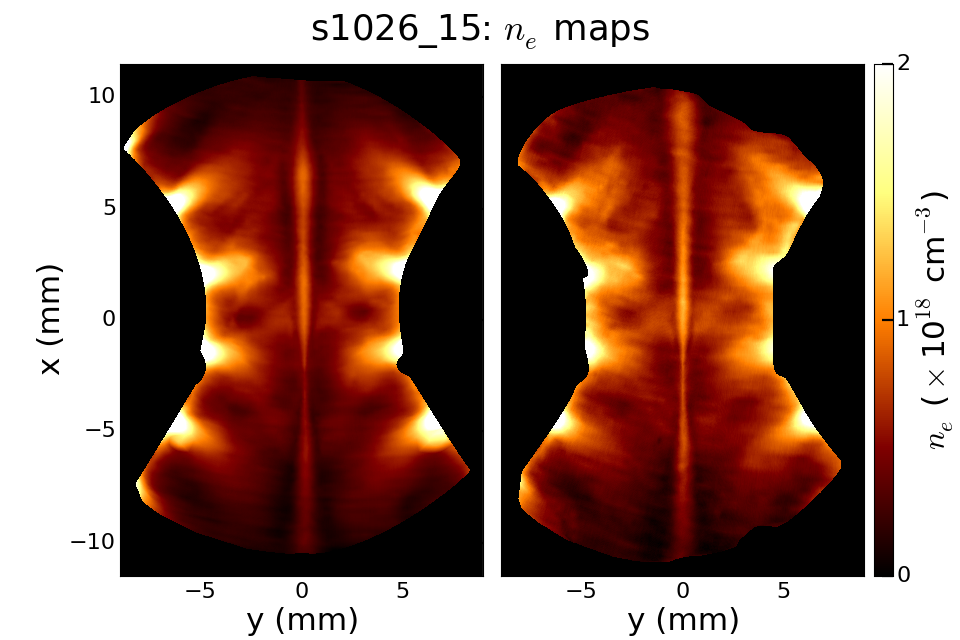

In [21]:
fig, [ax1, ax2]=plt.subplots(1,2,sharey=True, figsize=(12,8))
gim=ax1.imshow(g_ne/1e18, cmap='afmhot', interpolation='none', clim=[0,2], extent=[-9,9,-11.5,11.5], aspect='auto')
bim=ax2.imshow(b_ne/1e18, cmap='afmhot', interpolation='none', clim=[0,2], extent=[-9,9,-11.5,11.5], aspect='auto')
ax1.set_xlabel('y (mm)',fontsize=28)
ax1.set_ylabel('x (mm)',fontsize=28)
ax2.set_xlabel('y (mm)',fontsize=28)
ax2.set_xticks([-5,0,5])
ax1.set_xticks([-5,0,5])

ax1.tick_params(labelsize=20, pad=5, length=10, width=2)
ax2.tick_params(labelsize=20, pad=5, length=10, width=2)

fig.subplots_adjust(wspace=0.05)

cbar_ax = fig.add_axes([0.91, 0.10, 0.02, 0.8])#l,b,w,h

cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(bim, cax=cbar_ax, ticks=[0.0,1.0,2.0])
cbar_ax.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=28)
fig.suptitle(r's1026_15: $n_e$ maps', fontsize=32)


<IPython.core.display.Javascript object>


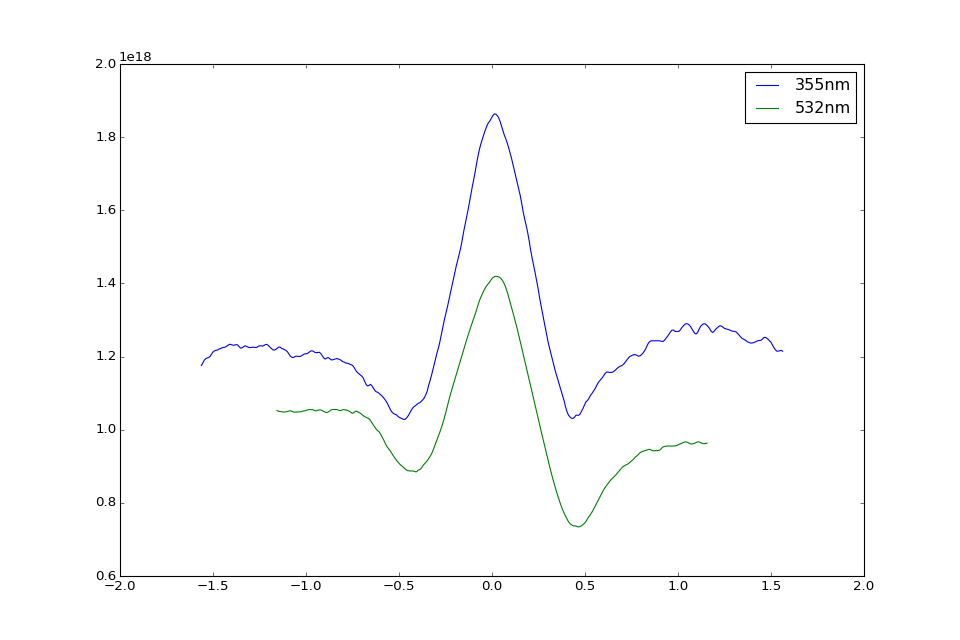

In [22]:
green_x_profile=np.mean(green[g_0[0]-200:g_0[0]+200,g_0[1]-20:g_0[1]+20], axis=1)
gx_profile_mm=np.linspace(-200,200, 400)/gs
blue_x_profile=np.mean(blue[b_0[0]-200:b_0[0]+200,b_0[1]-20:b_0[1]+20], axis=1)
bx_profile_mm=np.linspace(-200,200, 400)/bs

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(bx_profile_mm,blue_x_profile, label='355nm')
ax.plot(gx_profile_mm,green_x_profile, label='532nm')
ax.legend()

In [ ]:
green_x_profile=np.mean(green[g_0[0]-200:g_0[0]+200,g_0[1]-20:g_0[1]+20], axis=1)
gx_profile_mm=np.linspace(-200,200, 400)/gs
blue_x_profile=np.mean(blue[b_0[0]-200:b_0[0]+200,b_0[1]-20:b_0[1]+20], axis=1)
bx_profile_mm=np.linspace(-200,200, 400)/bs

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(bx_profile_mm,blue_x_profile, label='355nm')
ax.plot(gx_profile_mm,green_x_profile, label='532nm')
ax.legend()

In [53]:
%cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [54]:
green=np.loadtxt(open('s0513_15 neL end on.txt',"r"),delimiter=",")
green=green-np.nan_to_num(green).min()
green=np.nan_to_num(green)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


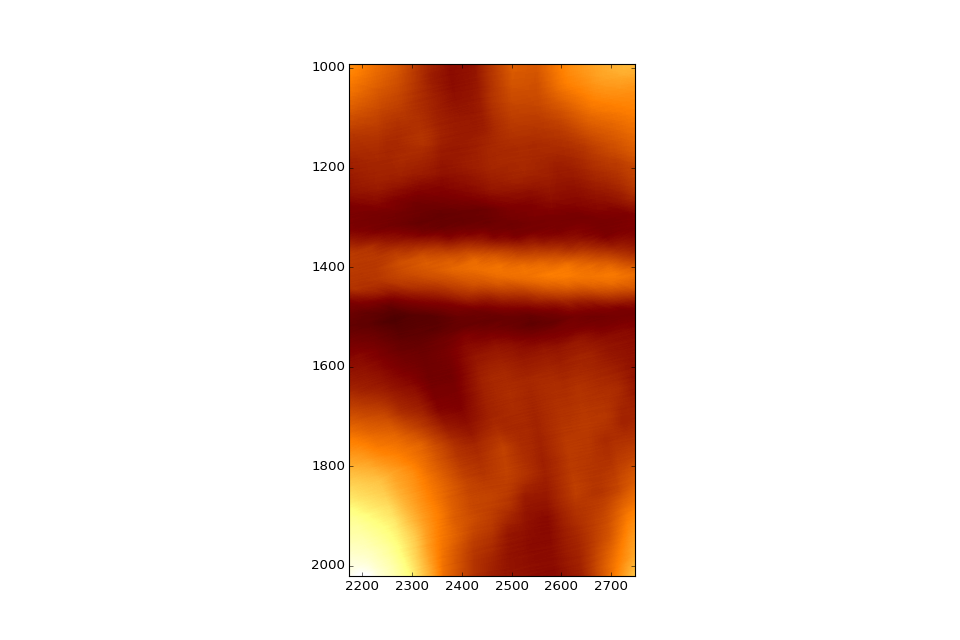

In [57]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(green, cmap='afmhot', interpolation='none', clim=[0,2e18])

In [68]:
g0=(1400,2440)
gs=173

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


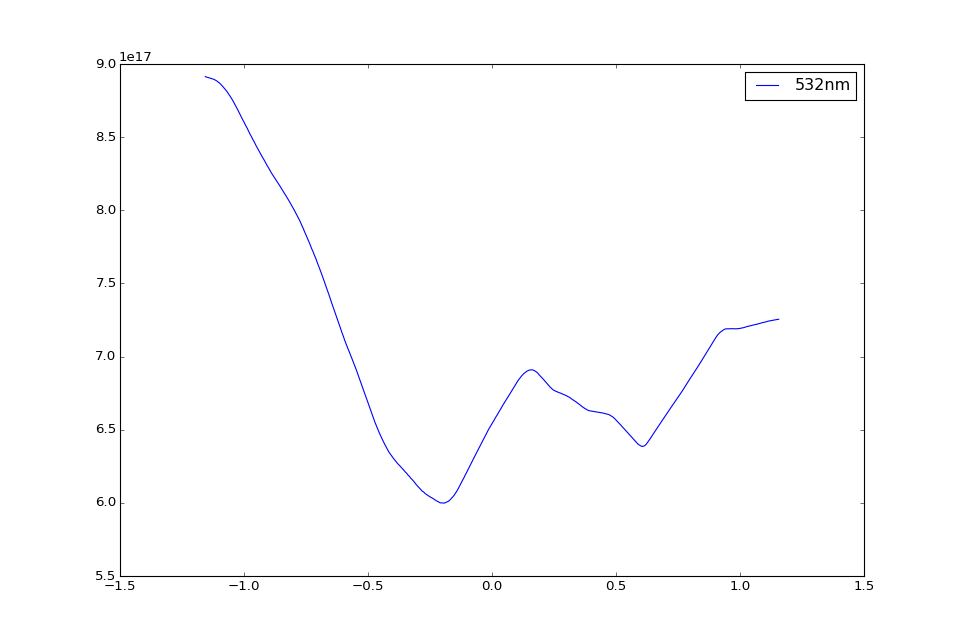

In [69]:
green_x_profile=np.mean(green[g_0[0]-20:g_0[0]+20,g_0[1]-200:g_0[1]+200], axis=0)
gx_profile_mm=np.linspace(-200,200, 400)/gs

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(gx_profile_mm,green_x_profile, label='532nm')
ax.legend()